In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg as la
import pandas as pd

1\. PCA on 3D dataset

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [2]:
mu_1 = 0

N = 1000

sigma_1 = 1
sigma_2 = 3

x_1 = np.random.normal(mu_1, sigma_1, N)
x_2 = x_1 + np.random.normal(mu_1, sigma_2, N)
x_3 =  2 * x_1 + x_2

X = np.array([x_1,x_2,x_3])

cov_mat = np.cov(X)
print("The covariance matrix is: \n",cov_mat)

l, V = la.eig(cov_mat)

print("Using the eigndecomposition: \n")
print("The eigenvalues are:\n ",l)
print("The eigenvectors are:\n ",V)


print("\n Now let's try to use the singular value decomposition: \n")
U, S, Vt = la.svd(cov_mat)

print("The eignvectors resume to: \n", U)
print("The eigenvalues instead:\n ",S)

print("\n Are eignvalues the same?", np.allclose(l, S))
print("\n Are eignvectors the same?", np.allclose(V,U))





The covariance matrix is: 
 [[ 0.99709226  0.88514733  2.87933185]
 [ 0.88514733  9.17413636 10.94443102]
 [ 2.87933185 10.94443102 16.70309472]]
Using the eigndecomposition: 

The eigenvalues are:
  [2.48552818e+01+0.j 1.12055387e-15+0.j 2.01904157e+00+0.j]
The eigenvectors are:
  [[-0.1191277  -0.81649658  0.56492648]
 [-0.57276311 -0.40824829 -0.71082751]
 [-0.8110185   0.40824829  0.41902544]]

 Now let's try to use the singular value decomposition: 

The eignvectors resume to: 
 [[-0.1191277   0.56492648 -0.81649658]
 [-0.57276311 -0.71082751 -0.40824829]
 [-0.8110185   0.41902544  0.40824829]]
The eigenvalues instead:
  [2.48552818e+01 2.01904157e+00 1.60307226e-15]

 Are eignvalues the same? False

 Are eignvectors the same? False


<ipython-input-14-396c372484c2>:3: ComplexWarning: Casting complex values to real discards the imaginary part
  print("By selecting the component 0, we retain %.2f%% of the total variability" % (l[0]/sum_eig *100))
<ipython-input-14-396c372484c2>:4: ComplexWarning: Casting complex values to real discards the imaginary part
  print("By selecting the component 1, we retain %.2f%% of the total variability" % (l[1]/sum_eig *100))
<ipython-input-14-396c372484c2>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  print("By selecting the component 2, we retain %.2f%% of the total variability" % (l[2]/sum_eig *100))


By selecting the component 0, we retain 92.49% of the total variability
By selecting the component 1, we retain 0.00% of the total variability
By selecting the component 2, we retain 7.51% of the total variability

If we select the first and the third principal components we get almost the 100% of the total variability.
So if we want to reduce the dimensionality we just have to compose the feature_vector with the two
eignvectors of the first and the second eignvalues, and do the dot moltiplication with th dataset X



[[ 2.01437996e+00  9.94277384e+00  6.36984079e+00 ...  5.01112615e+00
  -4.85346566e+00 -8.71477626e+00]
 [ 2.22044605e-16  0.00000000e+00  0.00000000e+00 ... -6.66133815e-16
   2.22044605e-16  0.00000000e+00]
 [-6.99087682e-01 -1.65586122e+00 -5.56486836e-01 ...  2.81565870e+00
  -9.64584062e-01 -4.37332895e-01]]


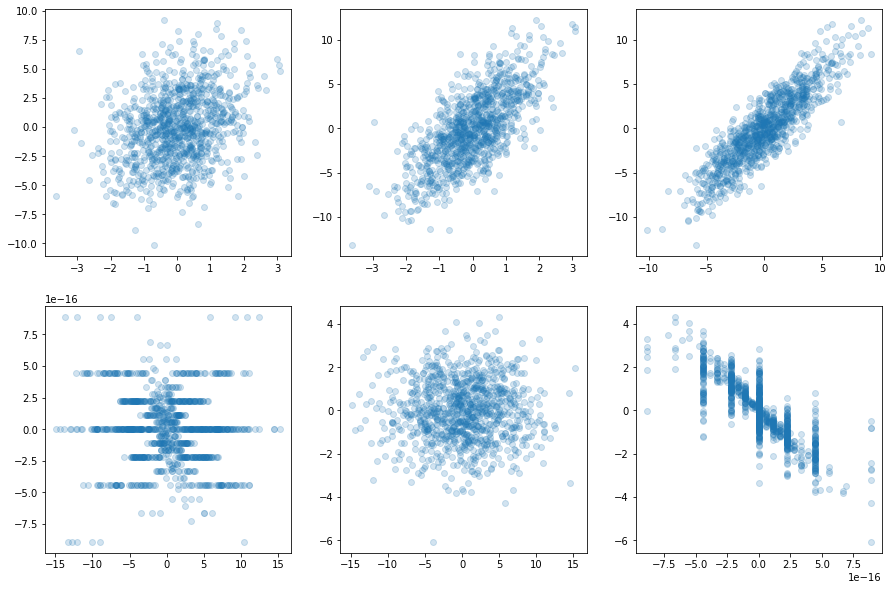

In [14]:
sum_eig = l.sum()

print("By selecting the component 0, we retain %.2f%% of the total variability" % (l[0]/sum_eig *100))
print("By selecting the component 1, we retain %.2f%% of the total variability" % (l[1]/sum_eig *100))
print("By selecting the component 2, we retain %.2f%% of the total variability" % (l[2]/sum_eig *100))


print("\nIf we select the first and the third principal components we get almost the 100% of the total variability.")
print("So if we want to reduce the dimensionality we just have to compose the feature_vector with the two")
print("eignvectors of the first and the second eignvalues, and do the dot moltiplication with th dataset X\n")


Xp = np.dot(V.T, X)
print("\n")
print(Xp)

def displayComparison(X,Xp):
    fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

    ax[0, 0].scatter(X[0],X[1], alpha=0.2)
    ax[0, 1].scatter(X[0],X[2], alpha=0.2)
    ax[0, 2].scatter(X[1],X[2], alpha=0.2)

    ax[1, 0].scatter(Xp[0],Xp[1], alpha=0.2)
    ax[1, 1].scatter(Xp[0],Xp[2], alpha=0.2)
    ax[1, 2].scatter(Xp[1],Xp[2], alpha=0.2)
    
displayComparison(X,Xp)



2\. PCA on a nD dataset

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

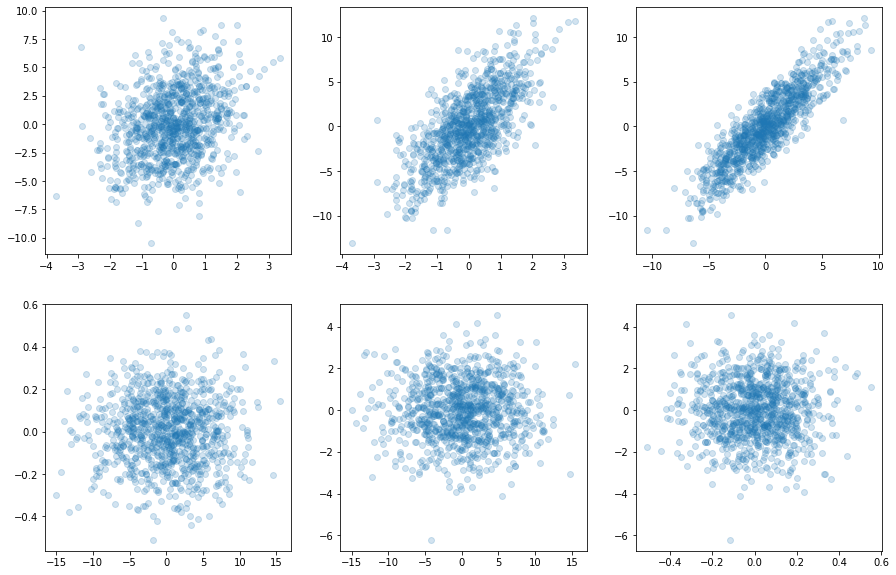

In [15]:
mu = 0
sigma = 1/20
noise = np.random.normal(mu,sigma,(3,N,10))
X_noise = X + np.sum(noise,axis=2)

cov_mat_noise = np.cov(X_noise)
l_noise, V_noise = la.eig(cov_mat_noise)
Xn = np.dot(V_noise.T, X_noise)

displayComparison(X_noise,Xn)

3\. **Optional**: PCA on the MAGIC dataset

Perform a PCA on the magic04.data dataset.

In [ ]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 